# Lecture 4 Polynomial Interpolation and Clustered Grids

### In numerical analysis, Chebyshev nodes are specific real algebraic numbers, namely the roots of the Chebyshev polynomials of the first kind. They are often used as nodes in polynomial interpolation because the resulting interpolation polynomial minimizes the effect of Runge's phenomenon.
###          -- Wikipedia, item "Chebyshev nodes"


Of course, not all problems can be treated as periodic. We now begin to consider how to construct spectral methods for bounded, nonperiodic domains.

Suppose that we wish to work on $[-1,1]$ with nonperiodic functions. One approach would be to pretend that the functions were periodic and use trigonometric (that is, Fourier) interpolation in equispaced points. This is what we did in Program 8. It is a method that works fine for problems like that one whose solutions are exponentially close to zero (or a constant) near the boundaries.

However, in general, a smooth function becomes nonsmooth when periodically extended. 



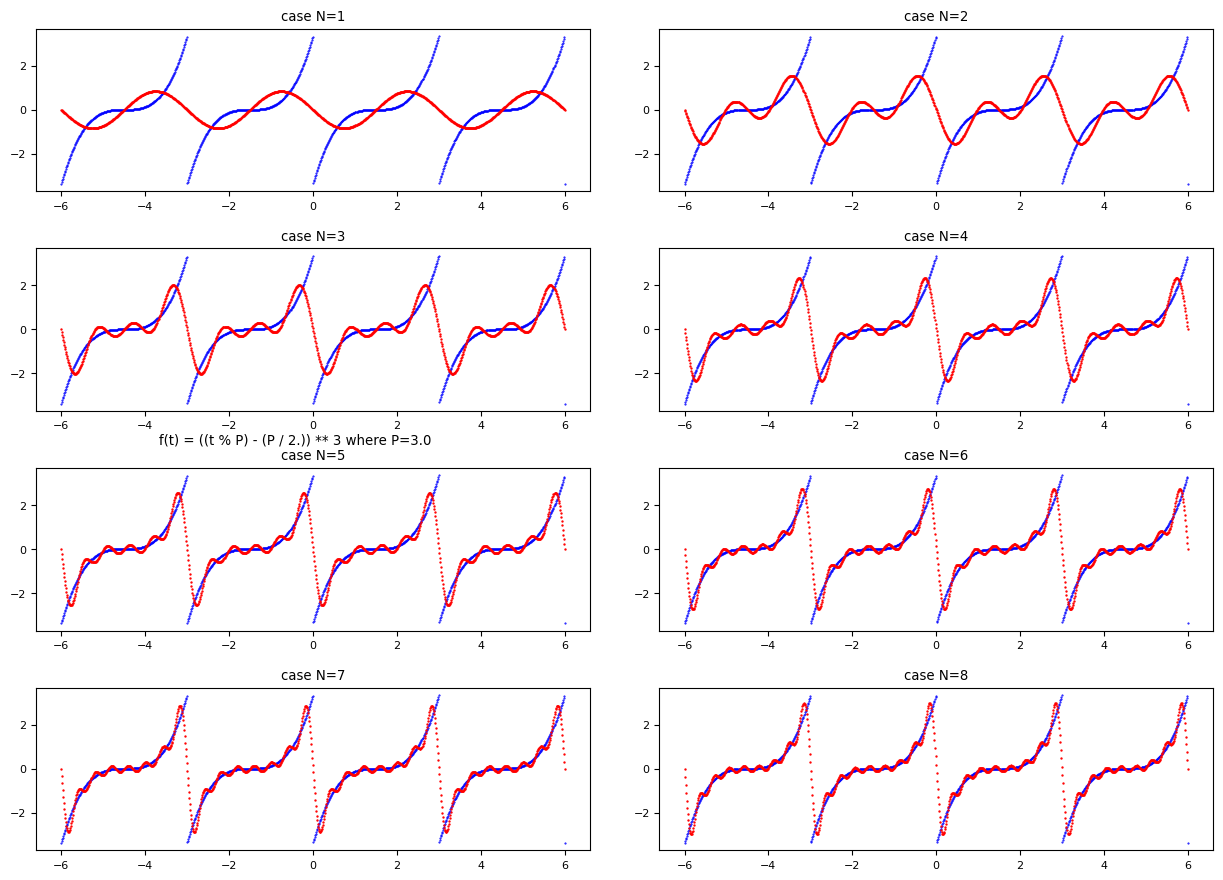

In [1]:
# https://computationalmindset.com/en/mathematics/fourier-series-in-python.html
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

#t is the independent variable
P = 3. #period value
BT=-6. #initian value of t (begin time)
ET=6. #final value of t (end time)
FS=1000 #number of discrete values of t between BT and ET

#the periodic real-valued function f(t) with period equal to P
f = lambda t: ((t % P) - (P / 2.)) ** 3

#all discrete values of t in the interval from BT and ET
t_range = np.linspace(BT, ET, FS)
y_true = f(t_range) #the true f(t)

#function that computes the real fourier couples of coefficients (a0, 0), (a1, b1)...(aN, bN)
def compute_real_fourier_coeffs(func, N):
    result = []
    for n in range(N+1):
        an = (2./P) * spi.quad(lambda t: func(t) * np.cos(2 * np.pi * n * t / P), 0, P)[0]
        bn = (2./P) * spi.quad(lambda t: func(t) * np.sin(2 * np.pi * n * t / P), 0, P)[0]
        result.append((an, bn))
    return np.array(result)

#function that computes the real form Fourier series using an and bn coefficients
def fit_func_by_fourier_series_with_real_coeffs(t, AB):
    result = 0.
    A = AB[:,0]
    B = AB[:,1]
    for n in range(0, len(AB)):
        if n > 0:
            result +=  A[n] * np.cos(2. * np.pi * n * t / P) + B[n] * np.sin(2. * np.pi * n * t / P)
        else:
            result +=  A[0]/2.
    return result

maxN=8
COLs = 2 #cols of plt
ROWs = 1 + (maxN-1) // COLs #rows of plt
plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(ROWs, COLs)
fig.tight_layout(rect=[0, 0, 2, 1.9], pad=3.0)
fig.suptitle('f(t) = ((t % P) - (P / 2.)) ** 3 where P=' + str(P))

#plot, in the range from BT to ET, the true f(t) in blue and the approximation in red
for N in range(1, maxN + 1):
    AB = compute_real_fourier_coeffs(f, N)
    #AB contains the list of couples of (an, bn) coefficients for n in 1..N interval.

    y_approx = fit_func_by_fourier_series_with_real_coeffs(t_range, AB)
    #y_approx contains the discrete values of approximation obtained by the Fourier series

    row = (N-1) // COLs
    col = (N-1) % COLs
    axs[row, col].set_title('case N=' + str(N))
    axs[row, col].scatter(t_range, y_true, color='blue', s=1, marker='.')
    axs[row, col].scatter(t_range, y_approx, color='red', s=2, marker='.')
plt.show()


**Gibbs phenomenon**: with a Fourier spectral method, the contamination caused by these discontinuities will be global, destroying the spectral accuracy. The error in the interpolant will be $O(1)$,the error in the first derivative will be $O(N)$, and so on. 

Instead, it is customary to replace trigonometric polynomials by algebraic polynomials, $p(x)=a_0+a_1x+... +a_Nx^N$.The first idea we might have is to use polynomial interpolation in equispaced points. Now this, as it turns out, is catastrophically bad in general. A problem known as the **Runge phenomenon** is encountered that is more extreme than the **Gibbs phenomenon**.

When smooth functions are interpolated by polynomials in $N +1$ equally spaced points, the approximations not only fail to converge in general as $N \to \infty$, but they get worse at a rate that may be as great as $2^N$.

**The right idea is polynomial interpolation in unevenly spaced points**. Various different sets of points are effective, but they all share a common property. Asymptotically as $N \to \infty$, the points are distributed with the density (per unit length)
$$ \mathrm{density}\sim \frac{N}{\pi\sqrt{1-x^2}}.$$
In particular this implies that the average spacing between points is $O(N^{-2})$ for $x\simeq \pm 1$ and $O(N^{-1})$ in the interior, with the average spacing between adjacent points near $x = 0$ asymptotic to $\pi/N$.

In most of this book we shall use the simplest example of a set of points
that satisfy the distribution, the so-called Chebyshev points,
$$ x_j = \cos(j\pi/N), \quad j = 0, 1, \dots, N.$$
Geometrically, we can visualize these points as the projections on $[-1, 1]$ of equispaced points on the upper half of the unit circle, as sketched in the following figure. Fuller names for ${x_j}$ include **Chebyshev-Lobatto** points and **Gauss-Chebyshev-Lobatto** points (alluding to their role in certain quadrature formulas) and **Chebyshev extreme** points (since they are the extreme points in $[-1, 1]$ of the Chebyshev polynomial $T_N(x)$), but for simplicity, in this book we just call them **Chebyshev** points.

<img src="https://www.mocaxintelligence.com/wp-content/uploads/2018/06/ChebyshevPoints2.png" width=400 height=240/>

[-1.         -0.93199267 -0.7828368  -0.56457705 -0.29566305  0.
  0.29566305  0.56457705  0.7828368   0.93199267  1.        ]
[-1.         -0.93400371 -0.7844839  -0.56523534 -0.29575814  0.
  0.29575814  0.56523534  0.7844839   0.93400371  1.        ]
[-1.         -0.93400143 -0.78448347 -0.56523533 -0.29575814  0.
  0.29575814  0.56523533  0.78448347  0.93400143  1.        ]
[-1.         -0.93400143 -0.78448347 -0.56523533 -0.29575814  0.
  0.29575814  0.56523533  0.78448347  0.93400143  1.        ]
[-1.         -0.93400143 -0.78448347 -0.56523533 -0.29575814  0.
  0.29575814  0.56523533  0.78448347  0.93400143  1.        ]


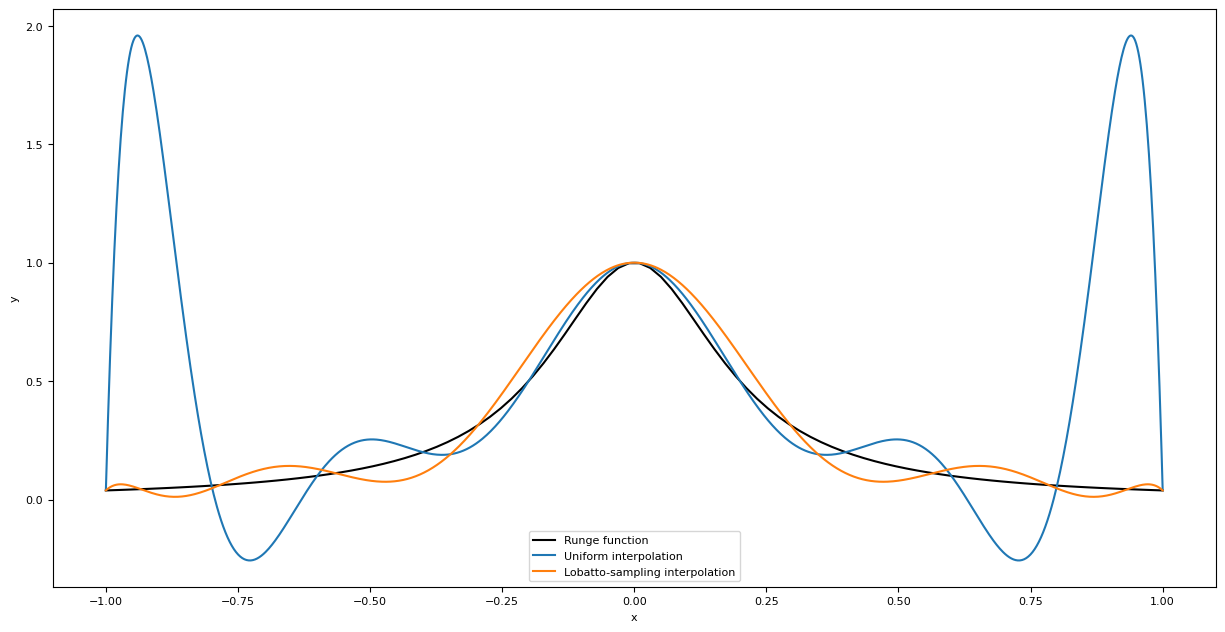

In [2]:
# https://nicoguaro.github.io/posts/numerical-10/
from __future__ import division
from numpy import (zeros_like, pi, cos, zeros, amax, abs,
                   array, linspace, prod)
import matplotlib.pyplot as plt


def lagrange(x_int, y_int, x_new):
    y_new = zeros_like(x_new)
    for xi, yi in zip(x_int, y_int):
        y_new += yi*prod([(x_new - xj)/(xi - xj)
                         for xj in x_int if xi!=xj], axis=0)
    return y_new


def gauss_lobatto(N, tol=1e-15):
    x = -cos(linspace(0, pi, N))
    P = zeros((N, N))  # Vandermonde Matrix
    x_old = 2
    while amax(abs(x - x_old)) > tol:
        x_old = x
        P[:, 0] = 1
        P[:, 1] = x
        for k in range(2, N):
            P[:, k] = ((2 * k - 1) * x * P[:, k - 1] -
                       (k - 1) * P[:, k - 2]) / k
        x = x_old - (x * P[:, N - 1] - P[:, N - 2]) / (N * P[:, N - 1])
        print(x)
    return array(x)


runge = lambda x: 1/(1 + 25*x**2)
x = linspace(-1, 1, 100)
x_int = linspace(-1, 1, 11)
x_int2 = gauss_lobatto(11)
x_new = linspace(-1, 1, 1000)
y_new = lagrange(x_int, runge(x_int), x_new)
y_new2 = lagrange(x_int2, runge(x_int2), x_new)
plt.figure(figsize=(15,7.5))
plt.plot(x, runge(x), "k")
plt.plot(x_new, y_new)
plt.plot(x_new, y_new2)
plt.legend(["Runge function",
            "Uniform interpolation",
            "Lobatto-sampling interpolation"])
plt.xlabel("x")
plt.ylabel("y")
plt.show()


# Program 9: Polynomial interpolation in equispaced and chebyshev points

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import pi,inf,linspace,arange,cos,polyval,polyfit
from numpy.linalg import norm
from matplotlib.pyplot import figure,subplot,plot,axis,title,text

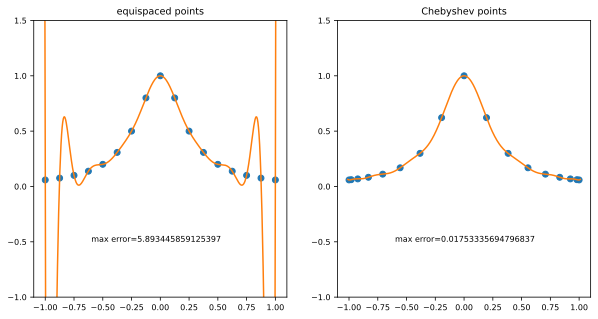

In [4]:
N = 16
xx = linspace(-1.01,1.01,400,True)
figure(figsize=(10,5))
for i in range(2):
    if i==0:
        s = 'equispaced points'; x = -1.0 + 2.0*arange(0,N+1)/N
    if i==1:
        s = 'Chebyshev points'; x = cos(pi*arange(0,N+1)/N)
    subplot(1,2,i+1)
    u = 1.0/(1.0 + 16.0*x**2)
    uu = 1.0/(1.0 + 16.0*xx**2)
    p = polyfit(x,u,N)
    pp= polyval(p,xx)
    plot(x,u,'o',xx,pp)
    axis([-1.1, 1.1, -1.0, 1.5])
    title(s)
    error = norm(uu-pp, inf)
    text(-0.6,-0.5,'max error='+str(error))

 # Accuracy of Chebyshev Interpolation
 If a monic polynomial $p$ has $N$ roots spaced according to the Chebyshev distribution in $[-1,1]$, then it will oscillate between values of comparable size on the order of $2^{-N}$ throughout $[-1, 1]$:

 $$ |p(x)-u(x)|\simeq e^{N\phi(x)}\simeq 2^{-N}, \quad x\in [-1, 1].$$
 
 The corresponding complex potential $\phi(z)$ is given by 
 
 $$ \phi(z) = \int_{-1}^1 \rho(x) \log|z-x| dx. $$

# Program 10: Polynomials and corresponding equipotential curves

In [5]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import pi,linspace,arange,abs,cos,poly,polyval,meshgrid,real,imag
from matplotlib.pyplot import figure,subplot,plot,title,axis,contour

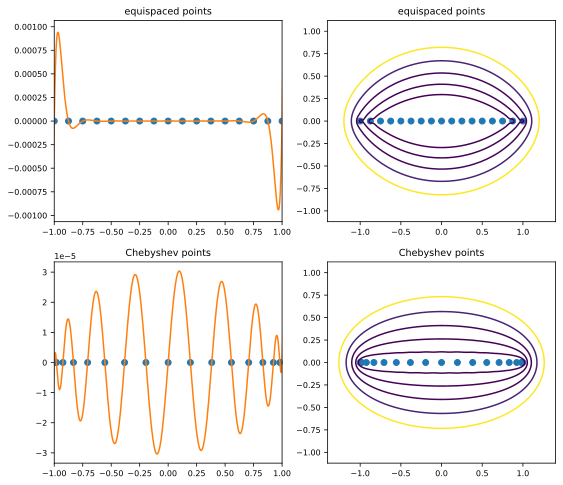

In [6]:
N = 16
figure(figsize=(9,8))
for i in range(2):
    if i==0:
        s = 'equispaced points'; x = -1.0 + 2.0*arange(0,N+1)/N
    if i==1:
        s = 'Chebyshev points'; x = cos(pi*arange(0,N+1)/N)
    p = poly(x)
    # Plot p(x)
    xx = linspace(-1.01,1.01,400,True)
    pp = polyval(p,xx)
    fig = subplot(2,2,2*i+1)
    plot(x,0*x,'o',xx,pp)
    fig.set_xlim(-1,1)
    title(s)
    
    # Plot equipotential curves
    subplot(2,2,2*i+2)
    plot(real(x),imag(x),'o')
    axis([-1.4,1.4,-1.12,1.12])
    xgrid = linspace(-1.4,1.4,250,True)
    ygrid = linspace(-1.12,1.12,250,True)
    xx,yy = meshgrid(xgrid,ygrid)
    zz = xx + 1j*yy
    pp = polyval(p,zz)
    levels = 10.0**arange(-4,1)
    contour(xx,yy,abs(pp),levels)
    title(s)

On the left, the degree 17 monic polynomials with equispaced and Chebyshev roots. On the right, some level curves of the corresponding potentials in the complex plane. Chebyshev points are good because they generate a potential for which $[-1, 1]$ is approximately a level curve.

## Theorem: Accuracy of Chebyshev spectral differentiation
Suppose $u$ is analytic on and inside the ellipse with foci $\pm 1$ on which the Chebyshev potential takes the value $\phi_f$, that is, the ellipse whose semimajor and semiminor axis lengths sum to $K = e^{\phi_f+\log 2}$. Let $w$ be the $\nu$ th Chebyshev spectral derivative of $u$ ($\nu\geq 1$). Then
$$ |w_j - u^{(\nu)}(x_j)|= O(e^{-N(\phi_f+\log 2)}) = O(K^{-N})$$

**Exercise 12** Modify Program 9 to compute and plot the maximum error over $[-1, 1]$ for equispaced and Chebyshev interpolation on a log scale as a function of $N$.